In [ ]:
from keras.datasets import mnist

In [ ]:
# load the data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# Add the numbers of layers of colors in image
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# Feature scaling
x_train = x_train / 255
x_test = x_test/ 255

In [ ]:
# import the classes
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# create the object of CNN
model = Sequential()

# add first convolution and pooling layer
model.add(Conv2D(filters=32, input_shape = (28,28,1), activation='relu',
                 kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# add second convolution and pooling layer
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# add third convolution and pooling layer
# model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3)))
# model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the layers
model.add(Flatten())

# Add the hidden layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the algorithm
model.fit(x_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
3000/3000 [==============================] - 17s 3ms/step - loss: 0.1155 - accuracy: 0.9653
Epoch 2/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0394 - accuracy: 0.9878
Epoch 3/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 5/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 6/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0086 - accuracy: 0.9970
Epoch 8/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 9/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0

In [ ]:
# Evaluate the algorithm on test / unseen data
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 22s 2ms/step - loss: 0.0476 - accuracy: 0.9910


[0.047603901475667953, 0.9909999966621399]

In [ ]:
import matplotlib.pyplot as plt

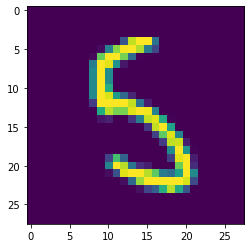

In [ ]:
plt.imshow(x_test[289].reshape(28,28))

In [ ]:
x_test[289].shape

(28, 28, 1)

In [ ]:
new = x_test[289].reshape(1,28,28,1)

In [ ]:
pred = model.predict(new)

1/1 [==============================] - 0s 17ms/step


In [ ]:
import numpy as np
np.argmax(pred)

5